In [99]:
import numpy as np
from scipy.special import factorial
from sympy.ntheory.continued_fraction import continued_fraction_reduce
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, HBox, Layout
from jupyterquiz import display_quiz

%config InlineBackend.figure_format = 'svg'

font = {'family' : 'serif',
        'size'   : 17,
        'weight' : 'normal'
       }

plt.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=20)
plt.rc('legend', fontsize=18)
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[T2A]{fontenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')


convergents = []

e_cont_frac = [2,]
for i in range(21):
    frac = continued_fraction_reduce(e_cont_frac)
    convergents.append(frac.evalf())
    e_cont_frac.append(1 if i % 3 != 1 else 2 * ((i + 2) // 3))
    
def plot_hyperbola(x_min, x_max, b):
    text_size = 24
    fig, ax = plt.subplots(figsize=(6, 6))
    xs = np.linspace(x_min, x_max, num=400)
    ax.plot(xs, 1./xs, c='r', lw=3, label=r"$y=\frac 1x$")
    fill_xs = np.linspace(1, b, num=100)
    ax.fill_between(fill_xs, 1./fill_xs, color='b', alpha=0.3)
    # ax.fill_between(1./fill_xs, fill_xs, color='g', alpha=0.3)
    plot_axes(ax, (x_max + 0.25, -0.05 / x_min), (0.1, 1.05/x_min))
    ax.set_xticks([1, b], ["$1$", "$b$"])
    ax.set_yticks([])
    ax.text(0.5*(1+0.9*b), 0.5/b, r"$S$", size=20)
    # ax.text(1.7, 0.2, r"$1$", size=20)
    # ax.text(0.6, 0.7, "?", size=20)
    #ax.set_title("Area = {:.4f}".format(np.log(b)))
    #ax.grid(ls=":");

def update_hyperbola(right):
    xs = np.linspace(1, 5, num=200)
    ax.fill_between(xs, 1./xs, color='white')
    fill_xs = np.linspace(1, right, num=100)
    ax.fill_between(fill_xs, 1./fill_xs, color='b', alpha=0.3)
    
def plot_hyperbola_interactive():
    ip = interactive(plot_hyperbola,right=FloatSlider(min=1.0, max=5.0, step=0.01, value=1.0, orientation='vertical', contnuous_update=False))
    box_layout = Layout(display='flex', flex_flow='row', justify_content='flex-start', align_items='center')
    display(HBox([ip.children[1], ip.children[0]], layout=box_layout))
    
def plot_axes(ax, x_pos, y_pos: tuple[float], text_size=24):
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.text(x_pos[0], x_pos[1], r"$x$", size=text_size)
    ax.text(y_pos[0], y_pos[1], r"$y$", size=text_size)
    arrow_fmt = dict(markersize=6, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
def plot_hyperbolae(x_max=5, save=False):
    text_size = 24
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    xs = np.linspace(1./x_max, x_max, num=400)
    ax1.plot(xs, 1./xs, c='r', lw=3, label=r"$y=\frac 1x$")
    fill_xs = np.linspace(1, np.e, num=100)
    ax1.fill_between(fill_xs, 1./fill_xs, color='b', alpha=0.3)
    ax1.fill_between(1./fill_xs, fill_xs, color='g', alpha=0.3)
    ax1.fill_between([0, 1/np.e], [np.e, np.e], color='orange', alpha=0.3)
    plot_axes(ax1, (5.25, -0.25), (.1, 5.2))
    ax1.set_xticks(np.union1d(np.arange(1, x_max+1), np.array([np.e, 1/np.e])),
                 [r"$\frac 1e$", "1", "2", "$e$", 3, 4, 5])
    ax1.set_yticks(np.arange(1, x_max+1))
    ax1.text(1.7, 0.2, r"$1$", size=20)
    ax1.text(0.6, 0.7, "?", size=20)
    ax1.grid(ls=":");
    
    ax2.plot(xs, 1./xs, c='r', lw=3, label=r"$y=\frac 1x$")
    fill_xs = np.linspace(1, np.e, num=100)
    ax2.fill_between(fill_xs, 1./fill_xs, color='b', alpha=0.3)
    ax2.fill_betweenx(fill_xs, 1./fill_xs, color='b', alpha=0.3)
    ax2.fill_between([0, 1], [1, 1], color='brown', alpha=0.3)
    plot_axes(ax2, (5.25, -0.25), (.1, 5.2))
    ax2.set_xticks(np.union1d(np.arange(1, x_max+1), np.array([np.e])),
                 ["1", "2", "$e$", 3, 4, 5])
    ax2.set_yticks(np.union1d(np.arange(1, x_max+1), np.array([np.e])),
                 ["1", "2", "$e$", 3, 4, 5])
    ax2.text(1.7, 0.2, r"$1$", size=20)
    ax2.grid(ls=":");
    if save:
        plt.savefig("hyperbolae.svg", format="svg")

def plot_number_system_efficiency(ns):
    n_min, n_max = 1, 16
    colors = ['r', 'b', 'g', 'm', 'brown', 'orange']
    qs = np.linspace(n_min, n_max, num=200)
    plt.figure(figsize=(11, 6))
    for i, n in enumerate(ns):
        plt.plot(qs, qs ** (n / qs), c=colors[i], lw=2, label=r'$n={}$'.format(n))
    plt.xlim(n_min, n_max)
    xlabels = ["1", "2", r"$e$"] + [str(i) for i in range(3, n_max + 1)]
    plt.xticks(np.sort(np.append(np.arange(n_min, n_max + 1), np.e)), xlabels)
    plt.xlabel(r"$q$", size=20)
    plt.grid(ls=":")
    plt.title("Efficiency of number systems")
    plt.legend();

def plot_e_taylor_convergent_derangement(n_max=20):
    plt.figure(figsize = (10, 6))
    n_array = np.arange(2, n_max + 1)
    z_n = np.cumsum(1.0 / factorial(np.arange(n_max + 1)))
    plt.semilogy(n_array, np.abs(np.e - np.array(convergents[2:n_max+1])),
                 c='r', lw=2, marker='o', markeredgecolor='b')
    plt.semilogy(n_array, np.e - z_n[2:n_max+1], c='orange', lw=2, marker='o',markeredgecolor='brown')
    plt.semilogy(n_array, np.abs(np.e - np.array(derangements[:n_max-1])), c='y', lw=2, marker='o',markeredgecolor='green')
    plt.xlim(2, n_max)
    plt.xlabel(r'$n$', fontsize=20)
    plt.title("Euler's number: series, continued fraction and derangements")
    plt.grid(ls=':')
    plt.legend([r'$|e - x_n|$', r'$e - s_n$', r'$|e - \frac{n!}{!n}|$'])
    plt.show();

# –ß–∏—Å–ª–æ $e$ –≤ –º–∞—Ç–µ–º–∞—Ç–∏–∫–µ

–í –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –≥–ª–∞–≤–∞—Ö –º—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —á–∏—Å–ª–∞ $e$:

* –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {eq}`e-def`: $e = \lim\limits_{n\to\infty} \big(1 + \frac 1n\big)^n$;
* —Å—É–º–º–∞ —Ä—è–¥–∞ {eq}`e-series`: $e = \sum\limits_{n=0}^\infty \frac 1{n!}$;
* —Ü–µ–ø–Ω–∞—è –¥—Ä–æ–±—å {eq}`e-continued`: $e = [2; 1, 2, 1, 1, 4, 1, 1, 6, 1, \ldots]$.

–°—é–¥–∞ –∂–µ –º–æ–∂–Ω–æ –æ—Ç–Ω–µ—Å—Ç–∏ –ø—Ä–∏–≤—ã—á–Ω—É—é –Ω–∞–º –∑–∞–ø–∏—Å—å –¥–µ—Å—è—Ç–∏—á–Ω–æ–π –¥—Ä–æ–±—å—é:

```{math}
:label: e-dec-series
    e = a_0 + \frac{a_1}{10} + \frac{a_2}{100} + \ldots + \frac{a_n}{10^n} + \ldots, \quad a_k \in \{0, \ldots, 9\},
```

–≥–¥–µ —Ü–∏—Ñ—Ä—ã $a_0 = 2$, $a_1 = 7$, $a_2 = 1$ –∏ —Ç.–¥. –í–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã–π —á–∏—Ç–∞—Ç–µ–ª—å –∑–∞–º–µ—Ç–∏—Ç, —á—Ç–æ {eq}`e-dec-series` —Ç–æ–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å—É–º–º—É —Ä—è–¥–∞, —Ç–æ–ª—å–∫–æ –≤ –æ—Ç–ª–∏—á–∏–µ {eq}`e-series` —É –µ–≥–æ —á–ª–µ–Ω–æ–≤ –Ω–µ—Ç —è–≤–Ω–æ–π –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏: –∫–∞–∂–¥–∞—è —Å–ª–µ–¥—É—é—â–∞—è —Ü–∏—Ñ—Ä–∞ $a_k$ –º–æ–∂–µ—Ç –±—ã—Ç—å –ª—é–±–æ–π. –í—Å–µ —á–µ—Ç—ã—Ä–µ –ø–æ–¥—Ö–æ–¥–∞ —Ä–æ–¥–Ω–∏—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π –æ–¥–Ω–æ –æ–±—Å—Ç–æ—è—Ç–µ–ª—å—Å—Ç–≤–æ: –≤ –∫–∞–∂–¥–æ–º —Å–ª—É—á–∞–µ —á–∏—Å–ª–æ $e$ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –∫–∞–∫ –ø—Ä–µ–¥–µ–ª –Ω–µ–∫–æ—Ç–æ—Ä–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã—Ö —á–∏—Å–µ–ª. 

–í –ø—Ä–∏–Ω—Ü–∏–ø–µ –ª—é–±–æ–µ –∏—Ä—Ä–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Å—Ö–æ–¥–Ω—ã–º –æ–±—Ä–∞–∑–æ–º. –û–¥–Ω–∞–∫–æ —á–∏—Å–ª–æ $e$ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –æ—Å–æ–±–µ–Ω–Ω–æ–µ, —á—Ç–æ –¥–ª—è –Ω–µ–≥–æ –±—ã–ª–æ –Ω–∞–π–¥–µ–Ω–æ –º–Ω–æ–∂–µ—Å—Ç–≤–æ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π. –í—Å–µ –æ–Ω–∏ —Ç–∞–∫ –∏–ª–∏ –∏–Ω–∞—á–µ —Å–≤—è–∑–∞–Ω—ã —Å –ø—Ä–µ–¥–µ–ª—å–Ω—ã–º –ø–µ—Ä–µ—Ö–æ–¥–æ–º.

–ß–∏—Å–ª–æ $e$ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –µ—â—ë –º–Ω–æ–≥–æ –≥–¥–µ –≤ –º–∞—Ç–µ–º–∞—Ç–∏–∫–µ.

## –ü–ª–æ—â–∞–¥—å –ø–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–º –≥–∏–ø–µ—Ä–±–æ–ª—ã

–ß–∏—Å–ª–æ $e$ –º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≥–µ–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫—Ä–∏–≤–æ–ª–∏–Ω–µ–π–Ω—É—é —Ç—Ä–∞–ø–µ—Ü–∏—é –ø–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–º –≥–∏–ø–µ—Ä–±–æ–ª—ã $y=\frac 1x$. –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –ª–µ–≤—É—é –≥—Ä–∞–Ω–∏—Ü—É —Ç—Ä–∞–ø–µ—Ü–∏–∏ –≤ —Ç–æ—á–∫–µ $a=1$. –ú–µ–Ω—è—è –ø—Ä–∞–≤—É—é –≥—Ä–∞–Ω–∏—Ü—É $b > 1$, –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å –∏–ª–∏ —É–º–µ–Ω—å—à–∞—Ç—å –ø–ª–æ—â–∞–¥—å $S$ —Å–∏–Ω–µ–π —Ç—Ä–∞–ø–µ—Ü–∏–∏. 

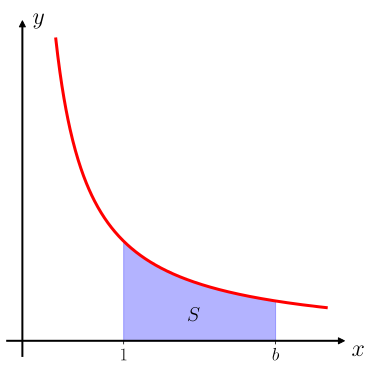

In [83]:
plot_hyperbola(0.33, 3, 2.5)

```{figure} hyp1.png
---
width: 300px
align: right
---
```

–°—É—â–µ—Å—Ç–≤—É–µ—Ç —Ä–æ–≤–Ω–æ –æ–¥–Ω–æ —á–∏—Å–ª–æ $b$, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —ç—Ç–∞ –ø–ª–æ—â–∞–¥—å —Ä–∞–≤–Ω–∞ –µ–¥–∏–Ω–∏—Ü–µ. –≠—Ç–æ –∏ –µ—Å—Ç—å —á–∏—Å–ª–æ $e$.

<span style="display:none" id="q_hyp_area">W3sicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzMCBcdTA0M2ZcdTA0M2JcdTA0M2VcdTA0NDlcdTA0MzBcdTA0MzRcdTA0NGMgXHUwNDM3XHUwNDM1XHUwNDNiXHUwNDUxXHUwNDNkXHUwNDNlXHUwNDM5IFx1MDQzYVx1MDQ0MFx1MDQzOFx1MDQzMlx1MDQzZVx1MDQzYlx1MDQzOFx1MDQzZFx1MDQzNVx1MDQzOVx1MDQzZFx1MDQzZVx1MDQzOSBcdTA0NDJcdTA0NDBcdTA0MzBcdTA0M2ZcdTA0MzVcdTA0NDZcdTA0MzhcdTA0MzgsIFx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQ0MFx1MDQzZVx1MDQzNVx1MDQzZFx1MDQzZFx1MDQzZVx1MDQzOSBcdTA0M2ZcdTA0M2UgXHUwNDNlXHUwNDQyXHUwNDQwXHUwNDM1XHUwNDM3XHUwNDNhXHUwNDQzICRcXGJpZ1tcXGZyYWMgMWU7IDFcXGJpZ10kPyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MTRcdTA0MzAhIFx1MDQxYVx1MDQzMFx1MDQzYSBcdTA0MzJcdTA0MzhcdTA0MzRcdTA0M2RcdTA0M2UgXHUwNDNkXHUwNDMwIFx1MDQzYVx1MDQzMFx1MDQ0MFx1MDQ0Mlx1MDQzOFx1MDQzZFx1MDQzYVx1MDQzNSBcdTA0MzhcdTA0MzcgXHUwNDNmXHUwNDNlXHUwNDM0XHUwNDQxXHUwNDNhXHUwNDMwXHUwNDM3XHUwNDNhXHUwNDM4LCBcdTA0MzhcdTA0NDFcdTA0M2FcdTA0M2VcdTA0M2NcdTA0MzBcdTA0NGYgXHUwNDNmXHUwNDNiXHUwNDNlXHUwNDQ5XHUwNDMwXHUwNDM0XHUwNDRjICRTJCBcdTA0NDNcdTA0MzRcdTA0M2VcdTA0MzJcdTA0M2JcdTA0MzVcdTA0NDJcdTA0MzJcdTA0M2VcdTA0NDBcdTA0NGZcdTA0MzVcdTA0NDIgXHUwNDQzXHUwNDQwXHUwNDMwXHUwNDMyXHUwNDNkXHUwNDM1XHUwNDNkXHUwNDM4XHUwNDRlICQxK1MrMSA9IDErMSsxJCJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQzZFx1MDQzNVx1MDQzMlx1MDQzNVx1MDQ0MFx1MDQzZFx1MDQzZSJ9XX1d</span>

In [33]:
display_quiz("#q_hyp_area")

<IPython.core.display.Javascript object>

````{admonition} Hint
:class: hint, dropdown
```{figure} hyperbolae.svg
---
width: 800px
align: center
---
```
````

## –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è

```{admonition} –ü—Ä–∏–º–µ—Ä –∏–∑ [–≤–∏–∫–∏–ø–µ–¥–∏–∏](https://en.wikipedia.org/wiki/E_(mathematical_constant)#Stochastic_representations)
:class: tip
–ë—É–¥–µ–º —Å–∫–ª–∞–¥—ã–≤–∞—Ç—å —Å–ª—É—á–∞–π–Ω—ã–µ —á–∏—Å–ª–∞ –∏–∑ –æ—Ç—Ä–µ–∑–∫–∞ $[0;1]$ –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞ –∏—Ö —Å—É–º–º–∞ –Ω–µ –ø—Ä–µ–≤—ã—Å–∏—Ç $1$. –ß–µ–º—É —Ä–∞–≤–Ω–æ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ —á–∏—Å–ª–∞ —Å–ª–∞–≥–∞–µ–º—ã—Ö?
```

–ü—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ —Ä–µ—à–∏—Ç—å –ø–æ–¥–æ–±–Ω—É—é –∑–∞–¥–∞—á—É –º–æ–∂–Ω–æ –æ—á–µ–Ω—å –ª–µ–≥–∫–æ —Å –ø–æ–º–æ—â—å—é –∫–æ–º–ø—å—é—Ç–µ—Ä–∞. –ë—É–¥–µ–º —Å–∫–ª–∞–¥—ã–≤–∞—Ç—å —Å–ª—É—á–∞–π–Ω—ã–µ —á–∏—Å–ª–∞, –ø–æ–∫–∞ –∏—Ö —Å—É–º–º–∞ –Ω–µ –ø—Ä–µ–≤–∑–æ–π–¥—ë—Ç $1$. –ü–æ–≤—Ç–æ—Ä–∏–≤ —ç—Ç–æ—Ç —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç $N$ —Ä–∞–∑, –≤—ã—á–∏—Å–ª–∏–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Å–ª–∞–≥–∞–µ–º—ã—Ö –≤ –∫–∞–∂–¥–æ–º –æ–ø—ã—Ç–µ. –≠—Ç–æ –∏ –±—É–¥–µ—Ç –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ–º –∏—Å–∫–æ–º–æ–≥–æ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è.

–≠—Ç–æ—Ç –ø–ª–∞–Ω —Ä–µ–∞–ª–∏–∑—É–µ—Ç —Å–ª–µ–¥—É—é—â–∞—è —Ñ—É–Ω–∫—Ü–∏—è `estimate_average(N)`.

In [18]:
from random import random 

def estimate_average(N):
    total_summands = 0
    for _ in range(N):
        s = 0
        while s <= 1:
            s += random()
            total_summands += 1
    return total_summands / N

–¢–µ–ø–µ—Ä—å –∑–∞–ø—É—Å—Ç–∏–º —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è $N= 10, 100, 1000, 10^4, 10^5, 10^6, 10^7$.

In [20]:
for n in [10**i for i in range(1, 8)]:
    print(f"N={n}, average number of summands = {estimate_average(n)}")

N=10, average number of summands = 2.6
N=100, average number of summands = 2.85
N=1000, average number of summands = 2.695
N=10000, average number of summands = 2.7205
N=100000, average number of summands = 2.71362
N=1000000, average number of summands = 2.71948
N=10000000, average number of summands = 2.7185328


–í–∏–¥–Ω–æ, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ $N$, —Ç–µ–º –±–ª–∏–∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∫ —á–∏—Å–ª—É $e$. –í–ø—Ä–æ—á–µ–º, —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å —Ç—É—Ç –¥–æ–≤–æ–ª—å–Ω–æ –º–µ–¥–ª–µ–Ω–Ω–∞—è, —á—Ç–æ –≤ —Ü–µ–ª–æ–º —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è —Ç–∞–∫–æ–≥–æ —Ä–æ–¥–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤.

```{warning}
–†–∞–∑—É–º–µ–µ—Ç—Å—è, –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω—ã–µ —Ä–∞—Å—á—ë—Ç—ã –Ω–∏ –≤ –∫–æ–µ–π –º–µ—Ä–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ–º —Ç–æ–≥–æ, —á—Ç–æ –∏—Å–∫–æ–º–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ $e$. –û–Ω–∏ –ª–∏—à—å –Ω–∞–≤–æ–¥—è—Ç –Ω–∞ –º—ã—Å–ª—å –æ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ—Å—Ç–∏ —ç—Ç–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã. –ó–Ω–∞–∫–æ–º—ã–µ —Å —Ç–µ–æ—Ä–∏–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π —á–∏—Ç–∞—Ç–µ–ª–∏ –º–æ–≥—É—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥–æ–∫–∞–∑–∞—Ç—å —Å–∏—é –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ç—Ä–æ–≥–æ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏ (—Å–º. –Ω–∏–∂–µ –∑–∞–¥–∞—á—É 2).
```

## –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Å–∏—Å—Ç–µ–º —Å—á–∏—Å–ª–µ–Ω–∏—è

<span style="display:none" id="q_number_system">W3sicXVlc3Rpb24iOiAiXHUwNDEyIFx1MDQzMlx1MDQzMFx1MDQ0OFx1MDQzOFx1MDQzYyBcdTA0NDBcdTA0MzBcdTA0NDFcdTA0M2ZcdTA0M2VcdTA0NDBcdTA0NGZcdTA0MzZcdTA0MzVcdTA0M2RcdTA0MzhcdTA0MzggXHUwNDM1XHUwNDQxXHUwNDQyXHUwNDRjICQyMCQgXHUwNDNhXHUwNDMwXHUwNDNhXHUwNDM4XHUwNDQ1LVx1MDQ0Mlx1MDQzZSBcdTA0NDZcdTA0MzhcdTA0NDRcdTA0NDAgXHUwNDNlXHUwNDQyICQwJCBcdTA0MzRcdTA0M2UgJDkkLiBcdTA0MWFcdTA0MzBcdTA0M2FcdTA0M2VcdTA0MzUgXHUwNDNjXHUwNDMwXHUwNDNhXHUwNDQxXHUwNDM4XHUwNDNjXHUwNDMwXHUwNDNiXHUwNDRjXHUwNDNkXHUwNDNlXHUwNDM1IFx1MDQzYVx1MDQzZVx1MDQzYlx1MDQzOFx1MDQ0N1x1MDQzNVx1MDQ0MVx1MDQ0Mlx1MDQzMlx1MDQzZSBcdTA0NDBcdTA0MzBcdTA0MzdcdTA0M2JcdTA0MzhcdTA0NDdcdTA0M2RcdTA0NGJcdTA0NDUgXHUwNDM0XHUwNDMyXHUwNDQzXHUwNDM3XHUwNDNkXHUwNDMwXHUwNDQ3XHUwNDNkXHUwNDRiXHUwNDQ1IFx1MDQ0N1x1MDQzOFx1MDQ0MVx1MDQzNVx1MDQzYiBcdTA0MzJcdTA0NGIgXHUwNDQxXHUwNDNjXHUwNDNlXHUwNDM2XHUwNDM1XHUwNDQyXHUwNDM1IFx1MDQzN1x1MDQzMFx1MDQzZlx1MDQzOFx1MDQ0MVx1MDQzMFx1MDQ0Mlx1MDQ0YyBcdTA0NDEgXHUwNDM4XHUwNDQ1IFx1MDQzZlx1MDQzZVx1MDQzY1x1MDQzZVx1MDQ0OVx1MDQ0Y1x1MDQ0ZT8gXHUwNDI3XHUwNDM4XHUwNDQxXHUwNDNiXHUwNDNlIFx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzNVx1MDQ0MiBcdTA0M2RcdTA0MzBcdTA0NDdcdTA0MzhcdTA0M2RcdTA0MzBcdTA0NDJcdTA0NGNcdTA0NDFcdTA0NGYgXHUwNDQxIFx1MDQzZFx1MDQ0M1x1MDQzYlx1MDQ0Zi4iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogOTAsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0MzAgXHUwNDQyXHUwNDM4XHUwNDNmXHUwNDMwICQwMCQgXHUwNDM4XHUwNDNiXHUwNDM4ICQwNyQgXHUwNDQyXHUwNDNlXHUwNDM2XHUwNDM1IFx1MDQ0MVx1MDQ0N1x1MDQzOFx1MDQ0Mlx1MDQzMFx1MDQzNVx1MDQzYyBcdTA0MzRcdTA0MzJcdTA0NDNcdTA0MzdcdTA0M2RcdTA0MzBcdTA0NDdcdTA0M2RcdTA0NGJcdTA0M2NcdTA0MzgifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzQwMC4wMDAxLCAxMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjFcdTA0NDJcdTA0M2VcdTA0M2JcdTA0NGNcdTA0M2FcdTA0M2UgXHUwNDMyXHUwNDMwXHUwNDQwXHUwNDM4XHUwNDMwXHUwNDNkXHUwNDQyXHUwNDNlXHUwNDMyIFx1MDQ0MVx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzMFx1MDQzMlx1MDQzOFx1MDQ0Mlx1MDQ0YyBcdTA0NDdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0M2UgXHUwNDM0XHUwNDMwXHUwNDM2XHUwNDM1IFx1MDQzOCBcdTA0M2RcdTA0MzUgXHUwNDNkXHUwNDMwXHUwNDM5XHUwNDM0XHUwNDUxXHUwNDQyXHUwNDQxXHUwNDRmIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDk5LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiJDAkIFx1MjAxNCBcdTA0NDJcdTA0M2VcdTA0MzZcdTA0MzUgXHUwNDQ3XHUwNDM4XHUwNDQxXHUwNDNiXHUwNDNlIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDEwMCwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDQzIFx1MDQzYVx1MDQzZVx1MDQzZFx1MDQzNVx1MDQ0N1x1MDQzZFx1MDQzZSEgXHUwNDFmXHUwNDQwXHUwNDM4IFx1MDQ0M1x1MDQ0MVx1MDQzYlx1MDQzZVx1MDQzMlx1MDQzOFx1MDQzOCwgXHUwNDQ3XHUwNDQyXHUwNDNlIFx1MDQzNVx1MDQ0MVx1MDQ0Mlx1MDQ0YyBcdTA0NDBcdTA0M2VcdTA0MzJcdTA0M2RcdTA0M2UgXHUwNDM0XHUwNDMyXHUwNDMwIFx1MDQ0ZFx1MDQzYVx1MDQzN1x1MDQzNVx1MDQzY1x1MDQzZlx1MDQzYlx1MDQ0Zlx1MDQ0MFx1MDQzMCBcdTA0M2FcdTA0MzBcdTA0MzZcdTA0MzRcdTA0M2VcdTA0MzkgXHUwNDQ2XHUwNDM4XHUwNDQ0XHUwNDQwXHUwNDRiLCBcdTA0M2NcdTA0M2VcdTA0MzZcdTA0M2RcdTA0M2UgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDRjIFx1MDQzMlx1MDQ0MVx1MDQzNSBcdTA0NDdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0MzAgXHUwNDNlXHUwNDQyICQwMCQgXHUwNDM0XHUwNDNlICQ5OSQifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiXHUwNDI3XHUwNDQyXHUwNDNlLVx1MDQ0Mlx1MDQzZSBcdTA0M2RcdTA0MzUgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDMwXHUwNDM1XHUwNDQyXHUwNDQxXHUwNDRmIn1dfSwgeyJxdWVzdGlvbiI6ICJcdTA0MWRcdTA0MzAgXHUwNDQxXHUwNDM1XHUwNDM5IFx1MDQ0MFx1MDQzMFx1MDQzNyBcdTA0NDMgXHUwNDMyXHUwNDMwXHUwNDQxIFx1MDQzNVx1MDQ0MVx1MDQ0Mlx1MDQ0YyAkMjAkIFx1MDQ0Nlx1MDQzOFx1MDQ0NFx1MDQ0MCwgXHUwNDNhXHUwNDMwXHUwNDM2XHUwNDM0XHUwNDMwXHUwNDRmIFx1MDQzOFx1MDQzNyBcdTA0M2FcdTA0M2VcdTA0NDJcdTA0M2VcdTA0NDBcdTA0NGJcdTA0NDUgXHUwNDQwXHUwNDMwXHUwNDMyXHUwNDNkXHUwNDMwICQwJCBcdTA0MzhcdTA0M2JcdTA0MzggJDEkLiBcdTA0MWFcdTA0MzBcdTA0M2FcdTA0M2VcdTA0MzUgXHUwNDNjXHUwNDMwXHUwNDNhXHUwNDQxXHUwNDM4XHUwNDNjXHUwNDMwXHUwNDNiXHUwNDRjXHUwNDNkXHUwNDNlXHUwNDM1IFx1MDQzYVx1MDQzZVx1MDQzYlx1MDQzOFx1MDQ0N1x1MDQzNVx1MDQ0MVx1MDQ0Mlx1MDQzMlx1MDQzZSBcdTA0NDBcdTA0MzBcdTA0MzdcdTA0M2JcdTA0MzhcdTA0NDdcdTA0M2RcdTA0NGJcdTA0NDUgXHUwNDM0XHUwNDM1XHUwNDQxXHUwNDRmXHUwNDQyXHUwNDM4XHUwNDM3XHUwNDNkXHUwNDMwXHUwNDQ3XHUwNDNkXHUwNDRiXHUwNDQ1IFx1MDQ0N1x1MDQzOFx1MDQ0MVx1MDQzNVx1MDQzYiBcdTA0MzIgXHUwNDM0XHUwNDMyXHUwNDNlXHUwNDM4XHUwNDQ3XHUwNDNkXHUwNDNlXHUwNDM5IFx1MDQ0MVx1MDQzOFx1MDQ0MVx1MDQ0Mlx1MDQzNVx1MDQzY1x1MDQzNSBcdTA0NDFcdTA0NDdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0MzVcdTA0M2RcdTA0MzhcdTA0NGYgXHUwNDMyXHUwNDRiIFx1MDQ0MVx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzNVx1MDQ0Mlx1MDQzNSBcdTA0MzdcdTA0MzBcdTA0M2ZcdTA0MzhcdTA0NDFcdTA0MzBcdTA0NDJcdTA0NGMgXHUwNDQxIFx1MDQzOFx1MDQ0NSBcdTA0M2ZcdTA0M2VcdTA0M2NcdTA0M2VcdTA0NDlcdTA0NGNcdTA0NGU/IFx1MDQyN1x1MDQzOFx1MDQ0MVx1MDQzYlx1MDQzZSBcdTA0M2VcdTA0M2ZcdTA0NGZcdTA0NDJcdTA0NGMtXHUwNDQyXHUwNDMwXHUwNDNhXHUwNDM4IFx1MDQzY1x1MDQzZVx1MDQzNlx1MDQzNVx1MDQ0MiBcdTA0M2RcdTA0MzBcdTA0NDdcdTA0MzhcdTA0M2RcdTA0MzBcdTA0NDJcdTA0NGNcdTA0NDFcdTA0NGYgXHUwNDQxIFx1MDQzZFx1MDQ0M1x1MDQzYlx1MDQ0Zi4iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWy0xMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMCwgMF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWFcdTA0M2VcdTA0M2JcdTA0MzhcdTA0NDdcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzJcdTA0M2UgXHUwNDMyXHUwNDMwXHUwNDQwXHUwNDM4XHUwNDMwXHUwNDNkXHUwNDQyXHUwNDNlXHUwNDMyIFx1MDQzZFx1MDQzNSBcdTA0M2NcdTA0M2VcdTA0MzZcdTA0MzVcdTA0NDIgXHUwNDMxXHUwNDRiXHUwNDQyXHUwNDRjIFx1MDQzZVx1MDQ0Mlx1MDQ0MFx1MDQzOFx1MDQ0Nlx1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQ0Ylx1MDQzYyJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMTg0NzU2LjAwMSwgMTAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDBdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDIxXHUwNDQyXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDNhXHUwNDNlIFx1MDQzMlx1MDQzMFx1MDQ0MFx1MDQzOFx1MDQzMFx1MDQzZFx1MDQ0Mlx1MDQzZVx1MDQzMiBcdTA0NDFcdTA0M2VcdTA0NDFcdTA0NDJcdTA0MzBcdTA0MzJcdTA0MzhcdTA0NDJcdTA0NGMgXHUwNDQ3XHUwNDM4XHUwNDQxXHUwNDNiXHUwNDNlIFx1MDQzNFx1MDQzMFx1MDQzNlx1MDQzNSBcdTA0MzggXHUwNDNkXHUwNDM1IFx1MDQzZFx1MDQzMFx1MDQzOVx1MDQzNFx1MDQ1MVx1MDQ0Mlx1MDQ0MVx1MDQ0ZiJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxMDIzLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiJDAkIFx1MjAxNCBcdTA0NDJcdTA0M2VcdTA0MzZcdTA0MzUgXHUwNDQ3XHUwNDM4XHUwNDQxXHUwNDNiXHUwNDNlIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDEwMjQsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlx1MDQyMlx1MDQzZVx1MDQ0N1x1MDQzZFx1MDQzZSBcdTA0NDJcdTA0MzBcdTA0M2EhIFx1MDQxNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0NDMgXHUwNDMyXHUwNDMwXHUwNDQxIFx1MDQzMiBcdTA0M2RcdTA0MzBcdTA0M2JcdTA0MzhcdTA0NDdcdTA0MzhcdTA0MzggXHUwNDNmXHUwNDNlICQxMCQgXHUwNDNkXHUwNDQzXHUwNDNiXHUwNDM1XHUwNDM5IFx1MDQzOCBcdTA0MzVcdTA0MzRcdTA0MzhcdTA0M2RcdTA0MzhcdTA0NDYsIFx1MDQzZFx1MDQzMCBcdTA0M2FcdTA0MzBcdTA0MzZcdTA0MzRcdTA0M2VcdTA0MzkgXHUwNDM4XHUwNDM3IFx1MDQzNFx1MDQzNVx1MDQ0MVx1MDQ0Zlx1MDQ0Mlx1MDQzOCBcdTA0M2ZcdTA0M2VcdTA0MzdcdTA0MzhcdTA0NDZcdTA0MzhcdTA0MzkgXHUwNDNjXHUwNDNlXHUwNDM2XHUwNDM1XHUwNDQyIFx1MDQzZFx1MDQzMFx1MDQ0NVx1MDQzZVx1MDQzNFx1MDQzOFx1MDQ0Mlx1MDQ0Y1x1MDQ0MVx1MDQ0ZiBcdTA0M2JcdTA0MzhcdTA0MzFcdTA0M2UgJDAkLCBcdTA0M2JcdTA0MzhcdTA0MzFcdTA0M2UgJDEkLiBcdTA0MTJcdTA0NDFcdTA0MzVcdTA0MzNcdTA0M2UgXHUwNDM2XHUwNDM1ICQyXnsxMH0gPSAxMDI0JCBcdTA0MzJcdTA0MzBcdTA0NDBcdTA0MzhcdTA0MzBcdTA0M2RcdTA0NDJcdTA0MzAifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiXHUwNDFjXHUwNDM4XHUwNDNjXHUwNDNlIn1dfV0=</span>

In [84]:
display_quiz("#q_number_system")

<IPython.core.display.Javascript object>

–ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ –Ω–∞ –æ—Ç–≤–µ—Ç—ã –≤ –¥–≤—É—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –∑–∞–¥–∞—á–∞—Ö. 

* –≤ –ø–µ—Ä–≤–æ–º —Å–ª—É—á–∞–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ $10^2 = 10^{\frac{20}{10}}= q^{\frac nq}$, –≥–¥–µ $n=20$ ‚Äî —á–∏—Å–ª–æ —Ü–∏—Ñ—Ä, $q=10$ ‚Äî –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –¥–µ—Å—è—Ç–∏—á–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã —Å—á–∏—Å–ª–µ–Ω–∏—è;

* –≤–æ –≤—Ç–æ—Ä–æ–º —Å–ª—É—á–∞–µ –æ—Ç–≤–µ—Ç –±—ã–ª $2^{10} = 2^{\frac{20}{2}}= q^{\frac nq}$, –≥–¥–µ $n=20$ ‚Äî —á–∏—Å–ª–æ —Ü–∏—Ñ—Ä, $q=2$ ‚Äî –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –¥–≤–æ–∏—á–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã —Å—á–∏—Å–ª–µ–Ω–∏—è.

–í –æ–±—â–µ–º —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ —É –≤–∞—Å –µ—Å—Ç—å $n$ —Ü–∏—Ñ—Ä –≤ $q$-–∏—á–Ω–æ–π —Å–∏—Å—Ç–µ–º–µ —Å—á–∏—Å–ª–µ–Ω–∏—è, —Ç–æ –≤ –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ –≤—ã –º–æ–∂–µ—Ç–µ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –∏–∑ –Ω–∏—Ö $q^{\frac nq}$ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª. –ß–µ–º –±–æ–ª—å—à–µ —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –±–æ–ª—å—à–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —á–∏—Å–µ–ª –º–æ–∂–Ω–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–±–æ—Ä–æ–º —Ü–∏—Ñ—Ä —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –¥–ª–∏–Ω—ã, –∏ —Ç–µ–º –±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞ —Å–∏—Å—Ç–µ–º–∞ —Å—á–∏—Å–ª–µ–Ω–∏—è. –û—Ü–µ–Ω–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Å–∏—Å—Ç–µ–º—ã —Å—á–∏—Å–ª–µ–Ω–∏—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –µ—ë –æ—Å–Ω–æ–≤–∞–Ω–∏—è $q$ –º–æ–∂–Ω–æ –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –≥—Ä–∞—Ñ–∏–∫–µ:

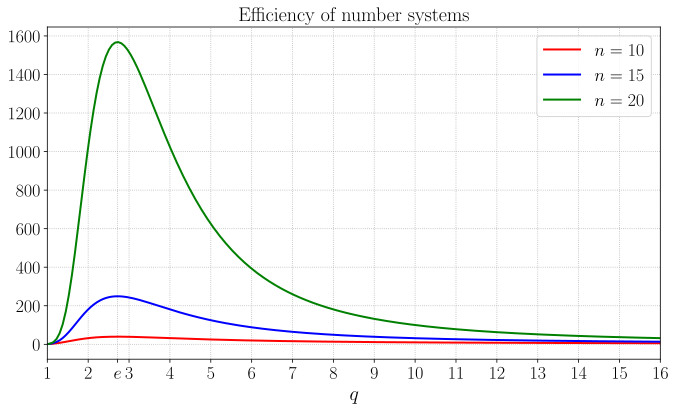

In [104]:
plot_number_system_efficiency([10, 15, 20])

–û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, —á—Ç–æ —Å–∞–º–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ —Å—á–∏—Å–ª–µ–Ω–∏—è –∏–º–µ–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–µ $q=e$, –∞ —Å–∞–º–æ–µ –≤—ã–≥–æ–¥–Ω–æ–µ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–µ –æ—Å–Ω–æ–≤–∞–Ω–∏–µ ‚Äî —Ç—Ä–æ–π–∫–∞. –ò —á–µ–º –±–æ–ª—å—à–µ $n$ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏—Ñ—Ä), —Ç–µ–º –∑–∞–º–µ—Ç–Ω–µ–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ —ç—Ç–∏—Ö –æ—Å–Ω–æ–≤–∞–Ω–∏–π –Ω–∞–¥ –ø—Ä–∏–≤—ã—á–Ω–æ–π –Ω–∞–º –¥–µ—Å—è—Ç–∏—á–Ω–æ–π —Å–∏—Å—Ç–µ–º–æ–π —Å—á–∏—Å–ª–µ–Ω–∏—è.

## –§–∞–∫—Ç–æ—Ä–∏–∞–ª

–í–µ—Ä–Ω—ë–º—Å—è –∫ –Ω–∞—à–µ–º—É —Å—Ç–∞—Ä–æ–º—É –∑–Ω–∞–∫–æ–º—Ü—É ‚Äî —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª—É: $n! = 1 \cdot 2 \cdot \ldots \cdot n$.

<span style="display:none" id="q_factorial">W3sicXVlc3Rpb24iOiAiXHUwNDFmXHUwNDNlXHUwNDQyXHUwNDQwXHUwNDM1XHUwNDNkXHUwNDM4XHUwNDQwXHUwNDQzXHUwNDM1XHUwNDNjIFx1MDQ0NFx1MDQzZVx1MDQ0MFx1MDQzY1x1MDQ0M1x1MDQzYlx1MDQ0YiBcdTA0NDEgXHUwNDQ0XHUwNDMwXHUwNDNhXHUwNDQyXHUwNDNlXHUwNDQwXHUwNDM4XHUwNDMwXHUwNDNiXHUwNDMwXHUwNDNjXHUwNDM4ISBcdTA0MTJcdTA0NGJcdTA0MzFcdTA0MzVcdTA0NDBcdTA0MzhcdTA0NDJcdTA0MzUgXHUwNDMyXHUwNDQxXHUwNDM1IFx1MDQzMlx1MDQzNVx1MDQ0MFx1MDQzZFx1MDQ0Ylx1MDQzNSBcdTA0NDBcdTA0MzBcdTA0MzJcdTA0MzVcdTA0M2RcdTA0NDFcdTA0NDJcdTA0MzJcdTA0MzAiLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIiRuISA9IG5cXGNkb3QgKG4tMSkhJCIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlx1MDQyZFx1MDQ0Mlx1MDQzZSBcdTA0M2VcdTA0NDFcdTA0M2RcdTA0M2VcdTA0MzJcdTA0M2RcdTA0MzBcdTA0NGYgXHUwNDQwXHUwNDM1XHUwNDNhXHUwNDQzXHUwNDQwXHUwNDQwXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDNkXHUwNDMwXHUwNDRmIFx1MDQ0NFx1MDQzZVx1MDQ0MFx1MDQzY1x1MDQ0M1x1MDQzYlx1MDQzMCBcdTA0MzRcdTA0M2JcdTA0NGYgXHUwNDQ0XHUwNDMwXHUwNDNhXHUwNDQyXHUwNDNlXHUwNDQwXHUwNDM4XHUwNDMwXHUwNDNiXHUwNDMwIn0sIHsiYW5zd2VyIjogIiQobisxKSEgPSBuIChuISArIChuLTEpISkkIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDE4IFx1MDQ0ZFx1MDQ0Mlx1MDQzZSBcdTA0MzJcdTA0MzVcdTA0NDBcdTA0M2RcdTA0M2UhIFx1MDQxNVx1MDQ0MVx1MDQzYlx1MDQzOCBcdTA0MzJcdTA0NGJcdTA0M2RcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzggXHUwNDM3XHUwNDMwIFx1MDQ0MVx1MDQzYVx1MDQzZVx1MDQzMVx1MDQzYVx1MDQzOCAkKG4tMSkhJCwgXHUwNDQyXHUwNDMwXHUwNDNjIFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzMFx1MDQzZFx1MDQzNVx1MDQ0Mlx1MDQ0MVx1MDQ0ZiAkbisxJDsgXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDNiXHUwNDM1IFx1MDQ0M1x1MDQzY1x1MDQzZFx1MDQzZVx1MDQzNlx1MDQzNVx1MDQzZFx1MDQzOFx1MDQ0ZiBcdTA0M2RcdTA0MzAgJG4kIFx1MDQzYVx1MDQzMFx1MDQzYSBcdTA0NDBcdTA0MzBcdTA0MzcgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDQxXHUwNDRmICQobisxKSEkIn0sIHsiYW5zd2VyIjogIiQobisxKSEgPSBuISArIChuLTEpISQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDIyXHUwNDMwXHUwNDNhXHUwNDNlXHUwNDMzXHUwNDNlIFx1MDQzN1x1MDQzMCBcdTA0NDRcdTA0MzBcdTA0M2FcdTA0NDJcdTA0M2VcdTA0NDBcdTA0MzhcdTA0MzBcdTA0M2JcdTA0M2VcdTA0M2MgXHUwNDNkXHUwNDM1IFx1MDQzMlx1MDQzZVx1MDQzNFx1MDQzOFx1MDQ0Mlx1MDQ0MVx1MDQ0ZiJ9LCB7ImFuc3dlciI6ICIkbiEgPSBuXntcXHVuZGVybGluZSBufSQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MWUgXHUwNDM0XHUwNDMwISBcdTA0MjRcdTA0MzBcdTA0M2FcdTA0NDJcdTA0M2VcdTA0NDBcdTA0MzhcdTA0MzBcdTA0M2JcdTA0NGNcdTA0M2RcdTA0MzBcdTA0NGYgXHUwNDQxXHUwNDQyXHUwNDM1XHUwNDNmXHUwNDM1XHUwNDNkXHUwNDRjICRuXntcXHVuZGVybGluZSBufSQgXHUwNDNmXHUwNDNlIFx1MDQzZVx1MDQzZlx1MDQ0MFx1MDQzNVx1MDQzNFx1MDQzNVx1MDQzYlx1MDQzNVx1MDQzZFx1MDQzOFx1MDQ0ZSBcdTA0NDBcdTA0MzBcdTA0MzJcdTA0M2RcdTA0MzAgJG5cXGNkb3QgKG4tMSkgXFxjZG90IFxcbGRvdHMgXFxjZG90IDEkIn0sIHsiYW5zd2VyIjogIiRcXGZyYWN7biF9eyhuLTIpIX0gPSAobi0xKShuLTIpJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0NDIsIFx1MDQ0ZFx1MDQ0Mlx1MDQzZSBcdTA0M2VcdTA0NDJcdTA0M2RcdTA0M2VcdTA0NDhcdTA0MzVcdTA0M2RcdTA0MzhcdTA0MzUgXHUwNDQwXHUwNDMwXHUwNDMyXHUwNDNkXHUwNDNlICRuKG4tMSkkIn0sIHsiYW5zd2VyIjogIiQoMm4pISA9IDJebiBcXGNkb3QgbiEkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQyZFx1MDQ0Mlx1MDQzZSBcdTA0M2RcdTA0MzVcdTA0MzJcdTA0MzVcdTA0NDBcdTA0M2RcdTA0M2UgXHUwNDQzXHUwNDM2XHUwNDM1IFx1MDQzZlx1MDQ0MFx1MDQzOCAkbj0yJCJ9XX1d</span>

In [97]:
display_quiz("#q_factorial")

<IPython.core.display.Javascript object>



```{admonition} –ö–æ–º–±–∏–Ω–∞—Ç–æ—Ä–Ω—ã–π —Å–º—ã—Å–ª —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞
:class: note
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–æ–∫ $n$ –æ–±—ä–µ–∫—Ç–æ–≤ —Ä–∞–≤–Ω–æ $n!$.
```

–ò —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—Å—Ç—ë—Ç –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ: —É–∂–µ $10!$ –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–∏—Ç –º–∏–ª–ª–∏–æ–Ω, –∞ $15!$ ‚Äî —Ç—Ä–∏–ª–ª–∏–æ–Ω. –¢–∞–∫–∞—è —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞ –≤ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–π —Å—Ç–µ–ø–µ–Ω–∏ –æ–±—ä—è—Å–Ω—è–µ—Ç –∫—Ä–∞–π–Ω–µ –±—ã—Å—Ç—Ä—É—é —Å–∫–æ—Ä–æ—Å—Ç—å —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ä—è–¥–∞ {eq}`e-series` –∫ —á–∏—Å–ª—É $e$.

–§–∞–∫—Ç–æ—Ä–∏–∞–ª —Ç–∞–∫–∂–µ —Ç–µ—Å–Ω–æ —Å–≤—è–∑–∞–Ω —Å —á–∏—Å–ª–æ–º $e$ –≤–µ–ª–∏–∫–æ–π –∏ –º–æ–≥—É—á–µ–π **—Ñ–æ—Ä–º—É–ª–æ–π –°—Ç–∏—Ä–ª–∏–Ω–≥–∞**:

$$
    n! \approx \Big(\frac ne\Big)^n \sqrt{2\pi n}.
$$

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–æ–π –°—Ç–∏—Ä–ª–∏–Ω–≥–∞ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö $n$. –ü—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –°—Ç–∏—Ä–ª–∏–Ω–≥–∞ –æ–±–æ–∑–Ω–∞—á–∏–º —á–µ—Ä–µ–∑ $d_n$.

In [93]:
import math

factorial = 1
for n in range(1, 11):
    d_n = (n / math.e) ** n * math.sqrt(2 * math.pi * n)
    print(f"n = {n}, n! = {factorial}, d_n = {d_n}")
    print(f"   |n! - d_n| = {abs(factorial - d_n):.6f}, |n! - d_n|/n! = {abs(factorial - d_n) / factorial:.6f}")
    factorial *= n + 1

n = 1, n! = 1, d_n = 0.9221370088957891
   |n! - d_n| = 0.077863, |n! - d_n|/n! = 0.077863
n = 2, n! = 2, d_n = 1.9190043514889832
   |n! - d_n| = 0.080996, |n! - d_n|/n! = 0.040498
n = 3, n! = 6, d_n = 5.836209591345864
   |n! - d_n| = 0.163790, |n! - d_n|/n! = 0.027298
n = 4, n! = 24, d_n = 23.506175132893294
   |n! - d_n| = 0.493825, |n! - d_n|/n! = 0.020576
n = 5, n! = 120, d_n = 118.0191679575901
   |n! - d_n| = 1.980832, |n! - d_n|/n! = 0.016507
n = 6, n! = 720, d_n = 710.078184642185
   |n! - d_n| = 9.921815, |n! - d_n|/n! = 0.013780
n = 7, n! = 5040, d_n = 4980.395831612462
   |n! - d_n| = 59.604168, |n! - d_n|/n! = 0.011826
n = 8, n! = 40320, d_n = 39902.39545265671
   |n! - d_n| = 417.604547, |n! - d_n|/n! = 0.010357
n = 9, n! = 362880, d_n = 359536.87284194835
   |n! - d_n| = 3343.127158, |n! - d_n|/n! = 0.009213
n = 10, n! = 3628800, d_n = 3598695.6187410373
   |n! - d_n| = 30104.381259, |n! - d_n|/n! = 0.008296


–í–∏–¥–Ω–æ, —á—Ç–æ –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å $\vert n! - d_n \vert$ –±—ã—Å—Ç—Ä–æ —Ä–∞—Å—Ç—ë—Ç, –∞ –≤–æ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å $\frac{\vert n! - d_n \vert}{n!}$ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è —Å —Ä–æ—Å—Ç–æ–º $n$. –ë–æ–ª–µ–µ –Ω–∞–≥–ª—è–¥–Ω–æ —ç—Ç–æ –º–æ–∂–Ω–æ –ø—Ä–æ—Å–ª–µ–¥–∏—Ç—å –≤ —Å–ª–µ–¥—É—é—â–µ–π —Ç–∞–±–ª–∏—Ü–µ:

```{table} –ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –æ—Ü–µ–Ω–∫–∏ —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞ —Ñ–æ—Ä–º—É–ª–æ–π –°—Ç–∏—Ä–ª–∏–Ω–≥–∞
:name: fact-table
|$n$ | $n!$                   |         $d_n$          | $\vert n! - d_n\vert$  | $\frac{\vert n! - d_n\vert}{n!}$ |
|:-----------:|:--------------|:-----------------|:---------------|:------------------|
|  1 | 1                  | 0.922137           | 0.077863           | 0.077863          |
|  2 | 2                  | 1.919004           | 0.080996           | 0.040498          |
|  3 | 6                  | 5.836210           | 0.163790           | 0.027298          |
|  4 | 24                 | 23.506175          | 0.493825           | 0.020576          |
|  5 | 120                | 118.019168         | 1.980832           | 0.016507          |
|  6 | 720                | 710.078185         | 9.921815           | 0.013780          |
|  7 | 5040               | 4980.395832        | 59.604168          | 0.011826          |
|  8 | 40320              | 39902.395453       | 417.604547         | 0.010357          |
|  9 | 362880             | 359536.872842      | 3343.127158        | 0.009213          |
| 10 | 3628800            | 3.598696e+06       | 3.010438e+04       | 0.008296          |
| 11 | 39916800           | 3.961563e+07       | 3.011749e+05       | 0.007545          |
| 12 | 479001600          | 4.756875e+08       | 3.314114e+06       | 0.006919          |
| 13 | 6227020800         | 6.187239e+09       | 3.978132e+07       | 0.006389          |
| 14 | 87178291200        | 8.666100e+10       | 5.172895e+08       | 0.005934          |
| 15 | 1307674368000      | 1.300431e+12       | 7.243646e+09       | 0.005539          |
```

–ü–æ–¥—Ä–æ–±–Ω–µ–µ –æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞—Ö —Ñ–æ—Ä–º—É–ª—ã –°—Ç–∏—Ä–ª–∏–Ω–≥–∞, –∞ —Ç–∞–∫–∂–µ –æ —Ä—è–¥–∞—Ö –°—Ç–∏—Ä–ª–∏–Ω–≥–∞ –º–æ–∂–Ω–æ –ø—Ä–æ—á–∏—Ç–∞—Ç—å –≤ —Å—Ç–∞—Ç—å–µ [–û—Ü–µ–Ω–∫–∏ —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞ –∏ —Ñ–æ—Ä–º—É–ª–∞ –°—Ç–∏—Ä–ª–∏–Ω–≥–∞](https://matob.ru/files/nomer100-01.pdf) (c. 71‚Äî77).

## –ë–µ—Å–ø–æ—Ä—è–¥–∫–∏ –∏ —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª—ã

<span style="display:none" id="q_derangements_3">W3sicXVlc3Rpb24iOiAiXHUwNDIyXHUwNDQwXHUwNDM4IFx1MDQzNFx1MDQzNlx1MDQzNVx1MDQzZFx1MDQ0Mlx1MDQzYlx1MDQ0Y1x1MDQzY1x1MDQzNVx1MDQzZFx1MDQzMCBcdTA0M2ZcdTA0M2VcdTA0NDFcdTA0M2JcdTA0MzUgXHUwNDM3XHUwNDMyXHUwNDMwXHUwNDNkXHUwNDNlXHUwNDMzXHUwNDNlIFx1MDQ0M1x1MDQzNlx1MDQzOFx1MDQzZFx1MDQzMCBcdTA0M2RcdTA0MzBcdTA0NDNcdTA0MzNcdTA0MzBcdTA0MzQgXHUwNDMyXHUwNDM3XHUwNDRmXHUwNDNiXHUwNDM4IFx1MDQ0MVx1MDQzMlx1MDQzZVx1MDQzOCBcdTA0NDhcdTA0M2JcdTA0NGZcdTA0M2ZcdTA0NGIgXHUwNDQxIFx1MDQzZlx1MDQzZVx1MDQzYlx1MDQzYVx1MDQzOC4gXHUwNDIxXHUwNDNhXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDNhXHUwNDM4XHUwNDNjXHUwNDM4IFx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQzZVx1MDQzMVx1MDQzMFx1MDQzY1x1MDQzOCBcdTA0M2VcdTA0M2RcdTA0MzggXHUwNDNjXHUwNDNlXHUwNDMzXHUwNDNiXHUwNDM4IFx1MDQ0ZFx1MDQ0Mlx1MDQzZSBcdTA0NDFcdTA0MzRcdTA0MzVcdTA0M2JcdTA0MzBcdTA0NDJcdTA0NGMgXHUwNDQyXHUwNDMwXHUwNDNhLCBcdTA0NDdcdTA0NDJcdTA0M2VcdTA0MzFcdTA0NGIgXHUwNDNhXHUwNDMwXHUwNDM2XHUwNDM0XHUwNDRiXHUwNDM5IFx1MDQzMlx1MDQzN1x1MDQ0Zlx1MDQzYiBcdTA0NDdcdTA0NDNcdTA0MzZcdTA0NDNcdTA0NGUgXHUwNDQ4XHUwNDNiXHUwNDRmXHUwNDNmXHUwNDQzPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiMCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MjVcdTA0M2VcdTA0NDJcdTA0NGYgXHUwNDMxXHUwNDRiIFx1MDQzZVx1MDQzNFx1MDQzOFx1MDQzZCBcdTA0NDFcdTA0M2ZcdTA0M2VcdTA0NDFcdTA0M2VcdTA0MzEgXHUwNDM1XHUwNDQxXHUwNDQyXHUwNDRjOiBcdTA0M2ZcdTA0MzVcdTA0NDBcdTA0MzJcdTA0NGJcdTA0MzkgXHUwNDM0XHUwNDM2XHUwNDM1XHUwNDNkXHUwNDQyXHUwNDNiXHUwNDRjXHUwNDNjXHUwNDM1XHUwNDNkIFx1MDQzMVx1MDQzNVx1MDQ0MFx1MDQ1MVx1MDQ0MiBcdTA0NDhcdTA0M2JcdTA0NGZcdTA0M2ZcdTA0NDMgXHUwNDMyXHUwNDQyXHUwNDNlXHUwNDQwXHUwNDNlXHUwNDMzXHUwNDNlLCBcdTA0MzJcdTA0NDJcdTA0M2VcdTA0NDBcdTA0M2VcdTA0MzkgXHUyMDE0IFx1MDQ0OFx1MDQzYlx1MDQ0Zlx1MDQzZlx1MDQ0MyBcdTA0NDJcdTA0NDBcdTA0MzVcdTA0NDJcdTA0NGNcdTA0MzVcdTA0MzNcdTA0M2UsIFx1MDQ0Mlx1MDQ0MFx1MDQzNVx1MDQ0Mlx1MDQzOFx1MDQzOSBcdTIwMTQgXHUwNDNmXHUwNDM1XHUwNDQwXHUwNDMyXHUwNDNlXHUwNDMzXHUwNDNlIn0sIHsiYW5zd2VyIjogIjEiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFmXHUwNDNlXHUwNDM4XHUwNDQ5XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzNVx1MDQ0OVx1MDQ1MSJ9LCB7ImFuc3dlciI6ICIyIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDEyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDNlISBcdTA0MTJcdTA0NDFcdTA0MzVcdTA0MzNcdTA0M2UgXHUwNDM1XHUwNDQxXHUwNDQyXHUwNDRjICQzIT02JCBcdTA0M2ZcdTA0MzVcdTA0NDBcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzBcdTA0M2RcdTA0M2VcdTA0MzJcdTA0M2VcdTA0M2EgXHUwNDM4XHUwNDM3IFx1MDQ0Mlx1MDQ0MFx1MDQ1MVx1MDQ0NSBcdTA0NDhcdTA0M2JcdTA0NGZcdTA0M2Y6IFxuICAgICAgICAgICAgICAgICRcXG1hdGhiYnsxMjN9LCBcXG1hdGhiYiAxIDMyLCAyMVxcbWF0aGJiIDMsIDIzMSwgMzEyLCAzXFxtYXRoYmIgMjEuJFxuICAgICAgICAgICAgICAgIFx1MDQxNlx1MDQzOFx1MDQ0MFx1MDQzZFx1MDQ0Ylx1MDQzYyBcdTA0M2ZcdTA0M2VcdTA0M2NcdTA0MzVcdTA0NDdcdTA0MzVcdTA0M2RcdTA0NGIgXHUwNDNkXHUwNDNlXHUwNDNjXHUwNDM1XHUwNDQwXHUwNDMwIFx1MDQ0OFx1MDQzYlx1MDQ0Zlx1MDQzZiwgXHUwNDM0XHUwNDNlXHUwNDQxXHUwNDQyXHUwNDMwXHUwNDMyXHUwNDQ4XHUwNDM4XHUwNDQ1XHUwNDQxXHUwNDRmIFx1MDQ0MVx1MDQzMlx1MDQzZVx1MDQzNVx1MDQzY1x1MDQ0MyBcdTA0MzJcdTA0M2JcdTA0MzBcdTA0MzRcdTA0MzVcdTA0M2JcdTA0NGNcdTA0NDZcdTA0NDMuIFx1MDQxZFx1MDQzNVx1MDQ0MiBcdTA0MzZcdTA0MzhcdTA0NDBcdTA0M2RcdTA0NGJcdTA0NDUgXHUwNDQ2XHUwNDM4XHUwNDQ0XHUwNDQwIFx1MDQ0Mlx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzYVx1MDQzZSBcdTA0MzIgXHUwNDM0XHUwNDMyXHUwNDQzXHUwNDQ1IFx1MDQzMlx1MDQzMFx1MDQ0MFx1MDQzOFx1MDQzMFx1MDQzZFx1MDQ0Mlx1MDQzMFx1MDQ0NS5cbiAgICAgICAgICAgICJ9LCB7ImFuc3dlciI6ICI0IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxY1x1MDQzZFx1MDQzZVx1MDQzM1x1MDQzZVx1MDQzMlx1MDQzMFx1MDQ0Mlx1MDQzZSJ9LCB7ImFuc3dlciI6ICI2IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQyMVx1MDQ0Mlx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzYVx1MDQzZSBcdTA0MzJcdTA0NDFcdTA0MzVcdTA0MzNcdTA0M2UgXHUwNDMyXHUwNDMwXHUwNDQwXHUwNDM4XHUwNDMwXHUwNDNkXHUwNDQyXHUwNDNlXHUwNDMyOyBcdTA0NDFcdTA0NDBcdTA0MzVcdTA0MzRcdTA0MzggXHUwNDNkXHUwNDM4XHUwNDQ1IFx1MDQzNVx1MDQ0MVx1MDQ0Mlx1MDQ0YyBcdTA0NDJcdTA0MzBcdTA0M2FcdTA0M2VcdTA0MzksIFx1MDQzZlx1MDQ0MFx1MDQzOCBcdTA0M2FcdTA0M2VcdTA0NDJcdTA0M2VcdTA0NDBcdTA0M2VcdTA0M2MgXHUwNDNhXHUwNDMwXHUwNDM2XHUwNDM0XHUwNDRiXHUwNDM5IFx1MDQzMVx1MDQzNVx1MDQ0MFx1MDQ1MVx1MDQ0MiBcdTA0NDFcdTA0MzJcdTA0M2VcdTA0NGUgXHUwNDQ4XHUwNDNiXHUwNDRmXHUwNDNmXHUwNDQzLCBcdTA0M2ZcdTA0M2VcdTA0NGRcdTA0NDJcdTA0M2VcdTA0M2NcdTA0NDMgXHUwNDRkXHUwNDQyXHUwNDNlXHUwNDQyIFx1MDQzZVx1MDQ0Mlx1MDQzMlx1MDQzNVx1MDQ0MiBcdTA0NDJcdTA0M2VcdTA0NDdcdTA0M2RcdTA0M2UgXHUwNDNkXHUwNDM1XHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDRiXHUwNDM5In0sIHsiYW5zd2VyIjogIjkiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDIxXHUwNDQyXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDNhXHUwNDM4XHUwNDQ1IFx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQ0MVx1MDQzZVx1MDQzMVx1MDQzZVx1MDQzMiBcdTA0MzJcdTA0MzdcdTA0NGZcdTA0NDJcdTA0NGMgXHUwNDQ4XHUwNDNiXHUwNDRmXHUwNDNmXHUwNDRiIFx1MDQzZFx1MDQzNSBcdTA0NDFcdTA0NDNcdTA0NDlcdTA0MzVcdTA0NDFcdTA0NDJcdTA0MzJcdTA0NDNcdTA0MzVcdTA0NDIsIFx1MDQzZFx1MDQzNSBcdTA0MzNcdTA0M2VcdTA0MzJcdTA0M2VcdTA0NDBcdTA0NGYgXHUwNDQzXHUwNDM2XHUwNDM1IFx1MDQzZSBcdTA0NDJcdTA0M2VcdTA0M2MsIFx1MDQ0N1x1MDQ0Mlx1MDQzZVx1MDQzMVx1MDQ0YiBcdTA0MzJcdTA0NDFcdTA0MzUgXHUwNDMyXHUwNDM3XHUwNDRmXHUwNDNiXHUwNDM4IFx1MDQ0N1x1MDQ0M1x1MDQzNlx1MDQzOFx1MDQzNSJ9XX1d</span>

In [98]:
display_quiz("#q_derangements_3", shuffle_answers=False)

<IPython.core.display.Javascript object>

```{admonition} –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
:class: note
–ü–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∞ $n$ –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **–±–µ—Å–ø–æ—Ä—è–¥–∫–æ–º**, –µ—Å–ª–∏ –æ–Ω–∞ –Ω–µ —Å–æ–¥–µ—Ä–∂–∏—Ç –Ω–µ–ø–æ–¥–≤–∏–∂–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤. –ò–Ω–∞—á–µ –≥–æ–≤–æ—Ä—è, –Ω–∏–∫—Ç–æ –∏–∑ $n$ –¥–∂–µ–Ω—Ç–ª—å–º–µ–Ω–æ–≤ –Ω–µ –≤–∑—è–ª —Å–≤–æ—é —à–ª—è–ø—É.
```

–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ $n$-–±–µ—Å–ø–æ—Ä—è–¥–∫–æ–≤ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è $!n$ (—á–∏—Ç–∞–µ—Ç—Å—è ***—Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª-—ç–Ω***). –ù–∞–ø—Ä–∏–º–µ—Ä:

* $!1 = 0$, —Ç–∞–∫ –∫–∞–∫ –≤ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–π –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–µ –∏–∑ –æ–¥–Ω–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ –æ–Ω –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å–≤–æ—ë–º –º–µ—Å—Ç–µ;
* $!2 = 1$, –≤–µ–¥—å –∏–∑ –¥–≤—É—Ö –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–æ–∫ $12$ –∏ $21$ –±–µ—Å–ø–æ—Ä—è–¥–∫–æ–º —è–≤–ª—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤—Ç–æ—Ä–∞—è;
* $!3 = 2$, –∫–∞–∫ –º—ã –≤–∏–¥–µ–ª–∏ –≤ –∑–∞–¥–∞—á–µ –æ –¥–∂–µ–Ω—Ç–ª—å–º–µ–Ω–∞—Ö –∏ –∏—Ö —à–ª—è–ø–∞—Ö.

–ü–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ø–æ–ª–∞–≥–∞—é—Ç $!0 = 1$.

<span style="display:none" id="q_derangements_4">W3sicXVlc3Rpb24iOiAiXHUwNDEyXHUwNDRiXHUwNDNmXHUwNDM4XHUwNDQ4XHUwNDM4XHUwNDQyXHUwNDM1IFx1MDQzMlx1MDQ0MVx1MDQzNSAkNCEgPSAyNCQgXHUwNDNmXHUwNDM1XHUwNDQwXHUwNDM1XHUwNDQxXHUwNDQyXHUwNDMwXHUwNDNkXHUwNDNlXHUwNDMyXHUwNDNlXHUwNDNhIFx1MDQzOFx1MDQzNyBcdTA0NDdcdTA0MzVcdTA0NDJcdTA0NGJcdTA0NDBcdTA0NTFcdTA0NDUgXHUwNDRkXHUwNDNiXHUwNDM1XHUwNDNjXHUwNDM1XHUwNDNkXHUwNDQyXHUwNDRiIFx1MDQzOCBcdTA0M2VcdTA0NDJcdTA0M2NcdTA0MzVcdTA0NDJcdTA0NGNcdTA0NDJcdTA0MzUgXHUwNDQyXHUwNDM1IFx1MDQzOFx1MDQzNyBcdTA0M2RcdTA0MzhcdTA0NDUsIFx1MDQzYVx1MDQzZVx1MDQ0Mlx1MDQzZVx1MDQ0MFx1MDQ0Ylx1MDQzNSBcdTA0NGZcdTA0MzJcdTA0M2JcdTA0NGZcdTA0NGVcdTA0NDJcdTA0NDFcdTA0NGYgXHUwNDMxXHUwNDM1XHUwNDQxXHUwNDNmXHUwNDNlXHUwNDQwXHUwNDRmXHUwNDM0XHUwNDNhXHUwNDMwXHUwNDNjXHUwNDM4LiBcdTA0MjdcdTA0MzVcdTA0M2NcdTA0NDMgXHUwNDQwXHUwNDMwXHUwNDMyXHUwNDNkXHUwNDNlICQhNCQ/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDksICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlx1MDQxZSBcdTA0MzRcdTA0MzAhIFx1MDQxMlx1MDQzZVx1MDQ0MiBcdTA0MzJcdTA0NDFcdTA0MzUgXHUwNDRkXHUwNDQyXHUwNDM4IFx1MDQzMVx1MDQzNVx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQ0MFx1MDQ0Zlx1MDQzNFx1MDQzYVx1MDQzODogJDIxNDMkLCAkMjM0MSQsICQyNDEzJCwgJDMxNDIkLCAkMzQxMiQsICQzNDIxJCwgJDQxMjMkLCAkNDMxMiQsICQ0MzIxJCJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMjQuMDAxLCAxZSsxOF0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIkITQkIFx1MDQzZFx1MDQzNSBcdTA0M2NcdTA0M2VcdTA0MzZcdTA0MzVcdTA0NDIgXHUwNDMxXHUwNDRiXHUwNDQyXHUwNDRjIFx1MDQzMVx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQ0OFx1MDQzNSwgXHUwNDQ3XHUwNDM1XHUwNDNjICQ0ISQifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWy0xZSsxOCwgMV0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MTRcdTA0MzBcdTA0MzZcdTA0MzUgXHUwNDNlXHUwNDM0XHUwNDNkXHUwNDNlXHUwNDMzXHUwNDNlIFx1MDQzMVx1MDQzNVx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQ0MFx1MDQ0Zlx1MDQzNFx1MDQzYVx1MDQzMCBcdTA0M2RcdTA0MzUgXHUwNDNkXHUwNDMwXHUwNDQ4XHUwNDNiXHUwNDNlXHUwNDQxXHUwNDRjPyBcdTA0MjFcdTA0M2VcdTA0M2NcdTA0M2RcdTA0MzhcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0M2UifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1IFx1MDQzZlx1MDQzZVx1MDQ0NVx1MDQzZVx1MDQzNlx1MDQzNSJ9XX1d</span>

In [27]:
display_quiz("#q_derangements_4")

<IPython.core.display.Javascript object>

–í—ã—á–∏—Å–ª—è—Ç—å —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª, –ø–µ—Ä–µ–±–∏—Ä–∞—è –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏, –¥–æ–≤–æ–ª—å–Ω–æ —É—Ç–æ–º–∏—Ç–µ–ª—å–Ω–æ —É–∂–µ –ø—Ä–∏ $n=4$. –ù–µ—Ç –ª–∏ —Å–ø–æ—Å–æ–±–∞ –ø–æ–ø—Ä–æ—â–µ? –ö–æ–Ω–µ—á–Ω–æ –∂–µ, –µ—Å—Ç—å! –û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, —á—Ç–æ –¥–ª—è —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞ —Ç–∞–∫–∞—è –∂–µ —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω–∞—è —Ñ–æ—Ä–º—É–ª–∞, –∫–∞–∫ –∏ –¥–ª—è —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞:

$$
    !(n+1) = n\cdot(!n + !(n-1)).
$$

–û—Ç—Å—é–¥–∞ –ø–æ–ª—É—á–∞–µ–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, —á—Ç–æ 

$$
!4 = 3\cdot(!3 + !2) = 3 \cdot(2 + 1) = 9,
$$

$$
!5 = 4\cdot(!4 + !3) = 4 \cdot(9+2) = 44.
$$

–ü—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –∫–æ–º–ø—å—é—Ç–µ—Ä—ã –∏ –≤—ã—á–∏—Å–ª—è—é—Ç —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª—ã. –ù–∏–∂–µ –ø—Ä–∏–≤–µ–¥—ë—Ç –∫–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –≤—ã–≤–æ–¥–∏ —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª –∏ —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª $n$ –¥–ª—è $0\leqslant n < 10$.

In [29]:
from scipy.special import factorial
from sympy import subfactorial

for n in range(10):
    print(f"n = {n}, n! = {factorial(n, exact=True)}, !n = {subfactorial(n)}")

n = 0, n! = 1, !n = 1
n = 1, n! = 1, !n = 0
n = 2, n! = 2, !n = 1
n = 3, n! = 6, !n = 2
n = 4, n! = 24, !n = 9
n = 5, n! = 120, !n = 44
n = 6, n! = 720, !n = 265
n = 7, n! = 5040, !n = 1854
n = 8, n! = 40320, !n = 14833
n = 9, n! = 362880, !n = 133496


–í—ã —Å–ø—Ä–æ—Å–∏—Ç–µ, –≥–¥–µ –∂–µ —Ç—É—Ç —á–∏—Å–ª–æ $e$? –ê –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –≤–¥–æ–±–∞–≤–æ–∫ –≤—ã–≤–µ—Å—Ç–∏ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ $\frac{n!}{!n}$ –ø—Ä–∏ $n>1$. –ü–æ–ª—É—á–∏—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ:

```{table} –§–∞–∫—Ç–æ—Ä–∏–∞–ª—ã –∏ —Å—É–±—Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª—ã
:name: fact-sub
|  $n$       | $n!$  | $!n$ | $\frac{n!}{!n}$ | True digits |
|:-----------:|:--------------|:-----------------|:---------------|:------:|
|  $4$         | $24$ | $9$ | $\mathbf{2}.(6)$    | $1$ |
|  $5$         | $120$ | $44$ | $\mathbf{2.7}2(72)$    | $2$ |
|  $6$         | $720$ | $265$ | $\mathbf{2.71}698\ldots$    | $3$ |
|  $7$         | $5040$ | $1854$ | $\mathbf{2.718}4466\dots$    | $4$ |
|  $8$         | $40320$ | $14833$ | $\mathbf{2.7182}63331\ldots$    | $5$ |
|  $9$         | $362880$ | $133496$ | $\mathbf{2.71828}369\ldots$    | $6$ |
|  $10$         | $3628800$ | $1334961$ | $\mathbf{2.718281}657\ldots$    | $7$|
```

–Ø–≤–Ω–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å

```{math}
:label: e-derangement
    \lim\limits_{n\to\infty}\frac{n!}{!n} = e.
```

–ü–µ—Ä–µ–≤–æ—Ä–∞—á–∏–≤–∞—è –¥—Ä–æ–±—å, –º–æ–∂–Ω–æ –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å —ç—Ç–æ—Ç –ø—Ä–µ–¥–µ–ª –∫–∞–∫

$$
\lim\limits_{n\to\infty}\frac{!n}{n!} = \frac 1e.
$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–æ–ª—è –±–µ—Å–ø–æ—Ä—è–¥–∫–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ $\frac 1e$ –æ—Ç —á–∏—Å–ª–∞ –≤—Å–µ—Ö –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–æ–∫.

–ò–∑ {numref}`—Ç–∞–±–ª–∏—Ü—ã %s <fact-sub>` —Ç–∞–∫–∂–µ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ {eq}`e-derangement` –ø–æ—á—Ç–∏ —Ç–∞–∫–∞—è –∂–µ –±—ã—Å—Ç—Ä–∞—è, –∫–∞–∫ –∏ –¥–ª—è —á–∞—Å—Ç–∏—á–Ω—ã—Ö —Å—É–º–º —Ä—è–¥–∞ {eq}`e-series`. –ß—Ç–æ –±—ã –∏ –≤–∏–¥–∏–º –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –≥—Ä–∞—Ñ–∏–∫–µ:

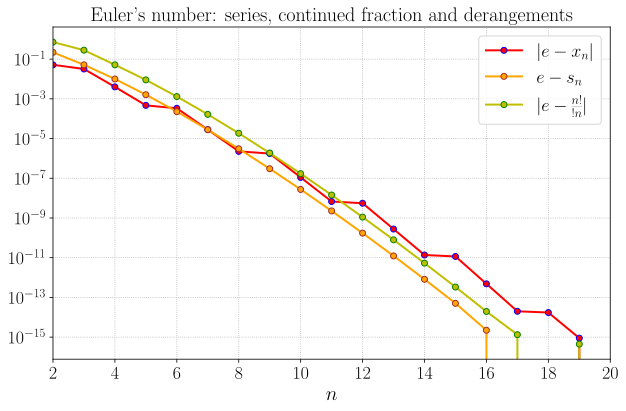

In [32]:
from sympy import subfactorial

derangements = []
for n in range(2, 21):
    # print(n, factorial(n, exact=True), subfactorial(n), factorial(n) / subfactorial(n))
    derangements.append(factorial(n) / subfactorial(n))
    
plot_e_taylor_convergent_derangement()

## –ó–∞–¥–∞—á–∏

1. –ü—É—Å—Ç—å $S(b)$ ‚Äî –ø–ª–æ—â–∞–¥—å –∫—Ä–∏–≤–æ–ª–∏–Ω–µ–π–Ω–æ–π —Ç—Ä–∞–ø–µ—Ü–∏–∏ –ø–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–º –≥–∏–ø–µ—Ä–±–æ–ª—ã $y = \frac 1x$, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –ø–æ –æ—Ç—Ä–µ–∑–∫—É $[1; b]$, $b > 1$. –û–ø—Ä–µ–¥–µ–ª–∏–º $S(a) = - S\big(\frac 1a \big)$ –ø—Ä–∏ $0 < a < 1$. –î–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ $S(bc) = S(b) + S(c)$ –ø—Ä–∏ –≤—Å–µ—Ö $b, c > 0$. 

2. –ü—É—Å—Ç—å $\xi_1, \xi_2, \ldots, \xi_n, \ldots$ ‚Äî –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã, —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–µ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[0; 1]$ –∏

    $$
        \eta = \min\{n\colon \xi_1 + \ldots + \xi_n > 1\}.
    $$

    –î–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ $\mathbb E\eta = e$.
    
3. –î–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è $f(x) = x^{\frac n x}$ –∏–º–µ–µ—Ç –≥–ª–æ–±–∞–ª—å–Ω—ã–π –º–∞–∫—Å–∏–º—É–º –≤ —Ç–æ—á–∫–µ $x = e$ –ø—Ä–∏ –ª—é–±–æ–º $n\in \mathbb N$.

4. üíª –í—ã—á–∏—Å–ª–∏—Ç–µ –∞–±—Å–æ–ª—é—Ç–Ω—É—é –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è —Ñ–∞–∫—Ç–æ—Ä–∏–∞–ª–∞ —É—Ç–æ—á–Ω—ë–Ω–Ω–æ–π —Ñ–æ—Ä–º—É–ª–æ–π –°—Ç–∏—Ä–ª–∏–Ω–≥–∞

    $$
        n! \approx \Big(\frac ne\Big)^n \sqrt{2\pi n} \Big(1 + \frac 1{12n}\Big).
    $$
    
    –°—Ä–∞–≤–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã {numref}`—Ç–∞–±–ª–∏—Ü—ã %s <fact-table>`.

4. –î–æ–∫–∞–∂–∏—Ç–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ

    $$
    !n = n!\left(1-\frac{1}{1!}+\frac{1}{2!}-\frac{1}{3!}+ \ldots +(-1)^n\frac{1}{n!}\right).
    $$

    *–£–∫–∞–∑–∞–Ω–∏–µ*. –í–∞–º –º–æ–∂–µ—Ç –ø—Ä–∏–≥–æ–¥–∏—Ç—å—Å—è [—Ñ–æ—Ä–º—É–ª–∞ –≤–∫–ª—é—á–µ–Ω–∏–π-–∏—Å–∫–ª—é—á–µ–Ω–∏–π](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%B2%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%BD%D0%B8%D0%B9-%D0%B8%D1%81%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%BD%D0%B8%D0%B9).

5. –î–æ–∫–∞–∂–∏—Ç–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ $!(n+1) = n\cdot(!n + !(n-1))$.
